## Exercise 1

In [271]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [7]:
data = pd.read_csv('dataset_02a.csv')
data.head()

,x1,x2,y
0,-3.361891,-11.234540,41.827925
1,-4.726925,8.632817,-79.325361
2,4.516668,-0.472354,4.984333
3,2.729386,-0.857615,2.554536
4,-1.533387,-4.890788,7.375071


In [19]:
X = data[["x1","x2"]]
Y = data["y"]

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [36]:
degree = 2
poly = PolynomialFeatures(degree = degree, include_bias = False)
poly_X_train = poly.fit_transform(X_train)
poly_X_test = poly.transform(X_test)

In [48]:
model = LinearRegression()
model.fit(poly_X_train, Y_train)

LinearRegression()

In [54]:
Y_pred = model.predict(poly_X_test)

In [56]:
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

In [58]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1.498134290802505
R-squared: 0.9990353371948506


In [60]:
print("Polynomial Features Names:")
print(poly.get_feature_names_out(['x1', 'x2']))

Polynomial Features Names:
['x1' 'x2' 'x1^2' 'x1 x2' 'x2^2']


In [68]:
train_sorted_idx = poly_X_train.argsort(axis=0).flatten()  # Sort x_train indices
test_sorted_idx = poly_X_test.argsort(axis=0).flatten()    # Sort x_test indices

x_train_sorted = poly_X_train[train_sorted_idx]
y_train_sorted = Y_train.iloc[train_sorted_idx]

x_test_sorted = poly_X_test[test_sorted_idx]
y_test_sorted = Y_test.iloc[test_sorted_idx]

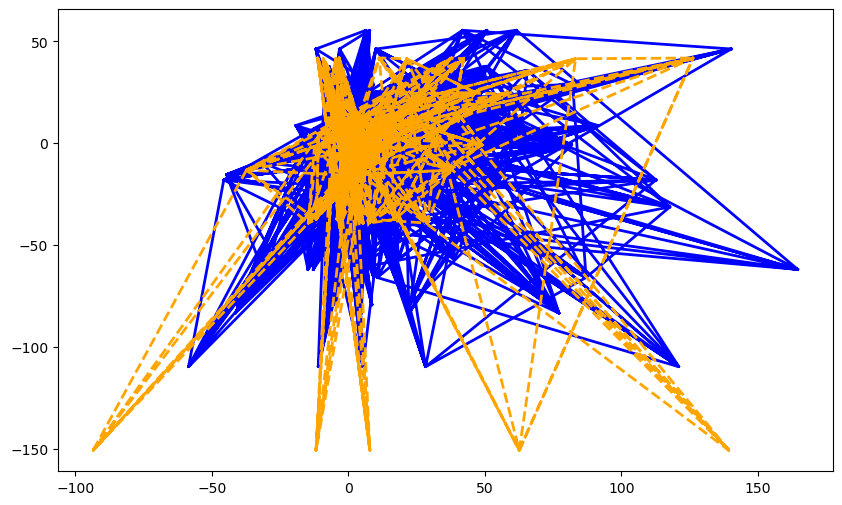

In [70]:
plt.figure(figsize = (10,6))
plt.plot(x_train_sorted, y_train_sorted, label="Training Data", color ="blue", linewidth=2)
plt.plot(x_test_sorted, y_test_sorted, label="Test Data", color="orange", linestyle='--', linewidth=2)

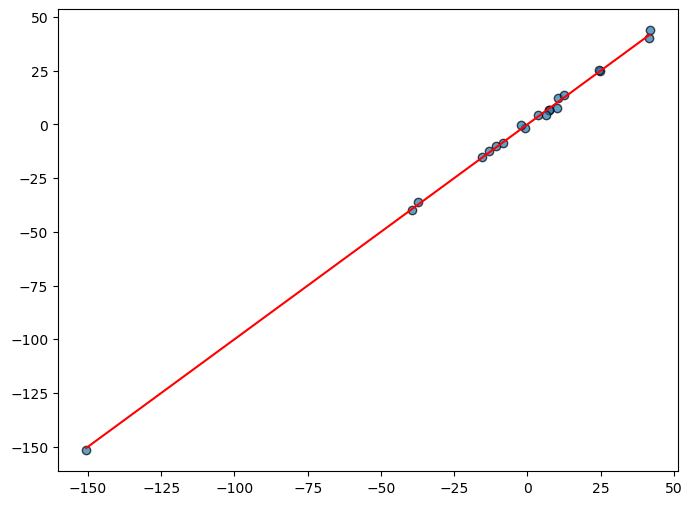

In [74]:
plt.figure(figsize=(8,6))
plt.scatter(Y_test, Y_pred, alpha=0.7, edgecolor='k', label="Predictions")
plt.plot([min(Y_test),max(Y_test)], [min(Y_test),max(Y_test)], color='red', label='Ideal fit')

In [76]:
data2 = pd.read_csv('dataset_03b.csv')

In [78]:
data2.head()

,x,y
0,-2.000000,5.663811
1,-1.932203,10.318552
2,-1.864407,13.947343
3,-1.796610,14.908132
4,-1.728814,14.486825


### Exercise 2

In [275]:
x2 = data2[["x"]]
y2 = data2["y"]

In [277]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.2, random_state = 42)

In [301]:
degree2 = np.arange(1, 20)
results = []
for d in degree2:
    poly2 = PolynomialFeatures(degree = d, include_bias = False)
    x2_poly_train = poly2.fit_transform(x2_train)
    x2_poly_test = poly2.transform(x2_test)
    model.fit(x2_poly_train, y2_train)
    y2_pred_train = model.predict(x2_poly_train)
    y2_pred = model.predict(x2_poly_test)
    mse2_train = mean_squared_error(y2_train, y2_pred_train)
    mse2 = mean_squared_error(y2_test, y2_pred)
    rsq2_train = r2_score(y2_train, y2_pred_train)
    rsq2 = r2_score(y2_test, y2_pred)
    
    results.append({
        "Degree": d,
        "MSE_Train": mse2_train,
        "MSE_test": mse2,
        "R2_Train": rsq2_train,
        "R2_Test": rsq2
    })
results_df = pd.DataFrame(results)
results_df


,Degree,MSE_Train,MSE_test,R2_Train,R2_Test
0,1,15.708645,7.790167,0.276903,0.478357
1,2,6.794400,12.156591,0.687242,0.185974
2,3,5.267646,14.389866,0.757521,0.036430
3,4,4.947734,18.080298,0.772247,-0.210687
4,5,1.530155,5.631923,0.929564,0.622877
5,6,1.499704,6.355918,0.930966,0.574397
6,7,0.139518,0.120920,0.993578,0.991903
7,8,0.139511,0.120975,0.993578,0.991899
8,9,0.134859,0.155137,0.993792,0.989612
9,10,0.134850,0.152284,0.993793,0.989803


In [285]:
kfold = KFold(n_splits = 5, shuffle = True, random_state = 42)
cv_scores = cross_val_score(model, x2_poly_test, y2_test, cv= kfold, scoring = 'neg_mean_squared_error')
cv_scores_mean = -cv_scores.mean()
print(f"Cross-Validation Scores: {-cv_scores}")
print(f"Mean MSE: {cv_scores_mean:.4f}")

Cross-Validation Scores: [22.74902974 15.67355257  0.26979806  0.41194406  0.53680883]
Mean MSE: 7.9282


In [269]:
x2 = sm.add_constant(x2)
model2 = sm.OLS(y,x).fit()
print(model.aic)

AttributeError: 'LinearRegression' object has no attribute 'aic'

## Execise 3

In [165]:
data3 = pd.read_csv("dataset 02c_train.csv")
data_test = pd.read_csv("dataset_02c_test.csv")
data_test.head()

,x1,x2,x3,x4,y
0,-1.837807,-1.807369,-1.217720,-1,-9.490245
1,-3.587509,-3.546426,-1.553949,-1,-24.009632
2,-3.790035,-3.693941,-2.540295,-1,-25.421809
3,-1.542335,-1.481508,-1.072919,-1,-7.698935
4,1.221079,1.149309,1.122202,1,5.072464


In [169]:
x3 = data3[["x1", "x2", "x3", "x4"]]
y3 = data3["y"]
x3_test = data_test[["x1", "x2", "x3", "x4"]]
y3_test = data_test["y"]

In [257]:
degree3 = 3
poly3 = PolynomialFeatures(degree = degree3, include_bias = False)
x3_poly = poly3.fit_transform(x3)
x3_test_poly = poly3.transform(x3_test)

In [259]:
model.fit(x3_poly, y3)
y3_pred = model.predict(x3_test_poly)

In [261]:
mse3 = mean_squared_error(y3_test, y3_pred)
print(f"Mean squared error for exercise 3: {mse3}")
rsq3 = r2_score(y3_test, y3_pred)
print(f"R-squared for exercise 3: {rsq3}")

Mean squared error for exercise 3: 3.482631680954685
R-squared for exercise 3: 0.9970789604086187


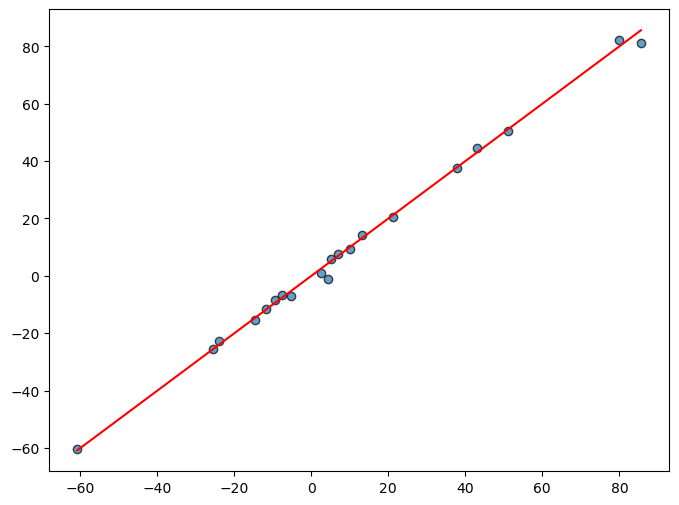

In [263]:
plt.figure(figsize=(8,6))
plt.scatter(y3_test, y3_pred, alpha=0.7, edgecolor='k', label="Predictions")
plt.plot([min(y3_test),max(y3_test)], [min(y3_test),max(y3_test)], color='red', label='Ideal fit')